# Set up notebook

In [1]:
print(1)

1


In [2]:
%load_ext rpy2.ipython

## r libraries

In [3]:
%%R
library(dplyr)
library(Seurat)
library(patchwork)
library(data.table)
library(DropletUtils)
library(scRNAseq)
library(scater)
library(scran)
library(PCAtools)
library(SoupX)
set.seed(110010101)

path_to <- "VEX1_RNAi_1_count6/outs/"

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Attaching SeuratObject

R[write to console]: data.table 1.14.2 using 64 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: 
Attaching package: ‘data.table’


R[write to console]: The following objects are masked from ‘package:dplyr’:

    between, first, last


R[write to console]: Loading required package: SingleCellExperiment

R[write to console]: Loading required package: SummarizedExperiment

R[write to console]: Loading required package: MatrixGenerics

R[write to console]: Loading required package: matrixStats

R[write to console]: 
Attaching package: ‘matrixStats’


R[write to console]: The following object is masked from ‘package:dplyr’:

    count


R[write to console

## python libraries

In [10]:
#%%R
#sessionInfo()

In [3]:
#!conda env export > environment.yml

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

path_to = "VEX1_RNAi_1_count6/outs/"

## Estimate and remove Background

R[write to console]: Loading raw count data

R[write to console]: Loading cell-only count data

R[write to console]: Loading extra analysis data where available

R[write to console]: 3 genes passed tf-idf cut-off and 3 soup quantile filter.  Taking the top 3.

R[write to console]: Using 6 independent estimates of rho.

R[write to console]: Estimated global rho of 0.29

R[write to console]: Expanding counts from 8 clusters to 9949 cells.



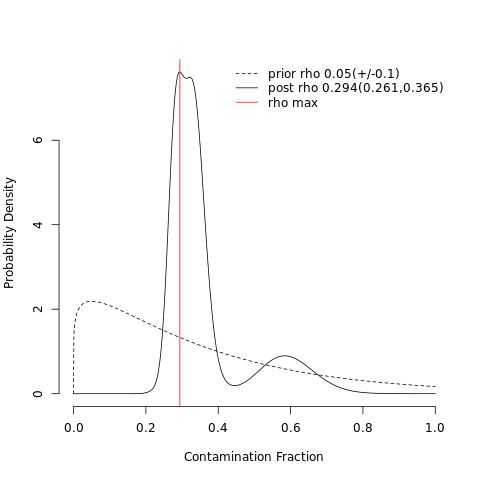

In [5]:
%%R
library(SoupX)
sce = load10X('VEX1_RNAi_1_count6/outs/')
sce = autoEstCont(sce, tfidfMin=0.85, forceAccept=TRUE)#, priorRhoStdDev = 0.3
out = adjustCounts(sce, roundToInt=TRUE)

In [6]:
%%R
head(sce$soupProfile[order(sce$soupProfile$est, decreasing = TRUE), ], n = 20)
#head(sce$soupProfile)

                             est counts
vsg-2-Tb427.BES40.22 0.044082486  59755
rRNA-Tb927.2.1975    0.013299624  18028
Tb927.1.2390         0.004443290   6023
Tb927.5.1810         0.004287631   5812
maxic-12S            0.002008813   2723
Tb11.v5.0498         0.001981517   2686
Tb927.5.810          0.001971927   2673
Tb927.3.3270         0.001596427   2164
Tb11.1810b           0.001547738   2098
Tb11.v5.0381         0.001498310   2031
Tb927.2.370          0.001485769   2014
Tb927.10.8940        0.001462900   1983
Tb927.11.9590        0.001454785   1972
Tb11.v5.0632         0.001331585   1805
Tb927.10.10000       0.001293962   1754
Tb927.9.12570        0.001262240   1711
Tb927.6.560          0.001232731   1671
Tb927.8.7410         0.001190681   1614
Tb927.11.7510        0.001170025   1586
Tb927.5.1610         0.001167074   1582


In [7]:
#Tb927.1.2390 beta tubulin
#Tb927.1.2390 ysosomal/endosomal membrane protein p67
#Tb11.v5.0498 lysosomal alpha-mannosidase precursor, putative
#Tb927.10.8940 flagellum targeting protein kharon1, putative
#Tb927.3.3270 ATP-dependent 6-phosphofructokinase, glycosomal

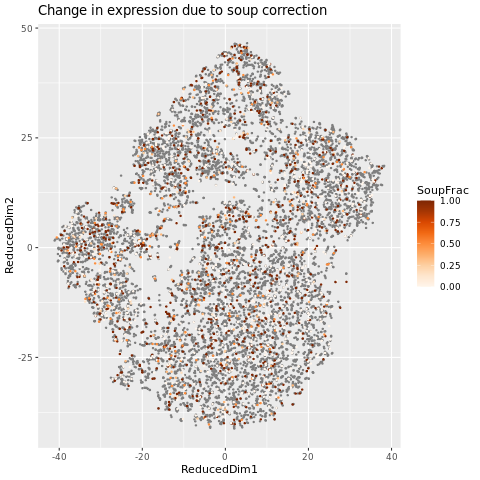

In [8]:
%%R
plotChangeMap(sce, out, "vsg-6-Tb427.BES15.12")

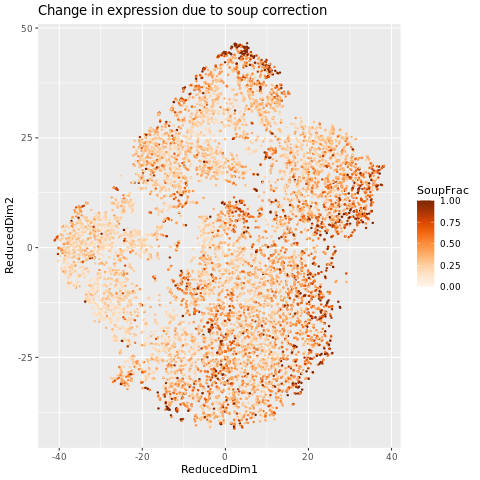

In [9]:
%%R
plotChangeMap(sce, out, "vsg-2-Tb427.BES40.22")

In [10]:
#%%R
#vsgGenes = c("vsg-6-Tb427.BES15.12", "vsg-2-Tb427.BES40.22")
#useToEst = estimateNonExpressingCells(sce, nonExpressedGeneList = list(vsgGenes = vsgGenes))
#sce = calculateContaminationFraction(sce, list(vsgGenes = vsgGenes), useToEst = useToEst)

In [11]:
#%%R
#sce = calculateContaminationFraction(sce, 
#                                     list(vsgGenes = vsgGenes), 
#                                     useToEst = useToEst, forceAccept=TRUE)

In [12]:
#%%R
#plotMarkerDistribution(sce)

# Load dataset

In [13]:
%%R
sce <- SingleCellExperiment(assays = list(counts = out))
sce

class: SingleCellExperiment 
dim: 11497 9949 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(9949): AAACCCAAGGTTTGAA-1 AAACCCACAAGTGGTG-1 ...
  TTTGTTGTCTAGAGCT-1 TTTGTTGTCTCCAATT-1
colData names(0):
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [14]:
%%R
assayNames(sce)

[1] "counts"


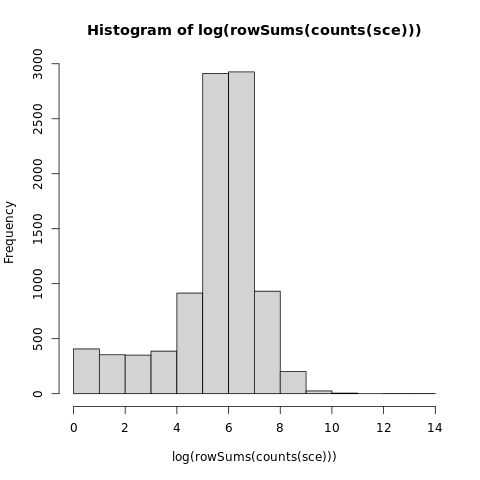

In [15]:
%%R
hist(log(rowSums(counts(sce))))

In [16]:
%%R
head(colSums(counts(sce))>25)

AAACCCAAGGTTTGAA-1 AAACCCACAAGTGGTG-1 AAACCCACAATAGGAT-1 AAACCCACATCCGTGG-1 
              TRUE               TRUE               TRUE               TRUE 
AAACCCACATGGTACT-1 AAACCCAGTAACATAG-1 
              TRUE               TRUE 


In [17]:
#%%R
#plotExprsFreqVsMean(sce)

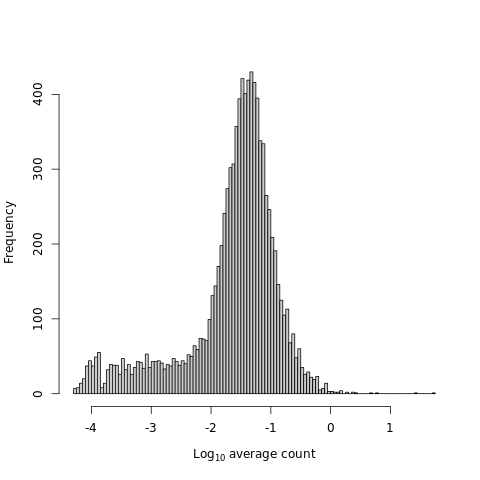

In [18]:
%%R
ave.counts <- calculateAverage(sce)
hist(log10(ave.counts), breaks=100, main="", col="grey80", 
    xlab=expression(Log[10]~"average count"))

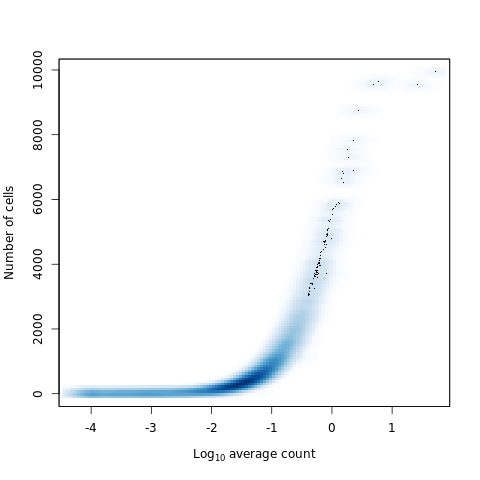

In [19]:
%%R
num.cells <- nexprs(sce, byrow=TRUE)
smoothScatter(log10(ave.counts), num.cells, ylab="Number of cells", 
    xlab=expression(Log[10]~"average count"))

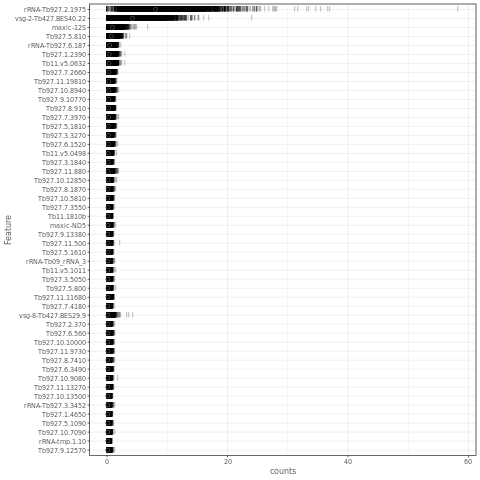

In [20]:
%%R
plotHighestExprs(sce,  as_percentage = TRUE)

# Add QC 
Default testing sum and detected transcripts plus:
- maxicircle
- ribosomal RNA
- VSGs

In [21]:
%%R
is.mito <- grepl("^maxic", rownames(sce))
is.vsg <- grepl("^vsg-", rownames(sce))
is.Ribo <-grepl("^rRNA-", rownames(sce)) 
df <- perCellQCMetrics(counts(sce), subsets=list(Mito=is.mito, VSG=is.vsg, Ribo=is.Ribo))
head(df)

DataFrame with 6 rows and 11 columns
                         sum  detected subsets_Mito_sum subsets_Mito_detected
                   <numeric> <integer>        <numeric>             <integer>
AAACCCAAGGTTTGAA-1       565       473                6                     2
AAACCCACAAGTGGTG-1       610       447               26                     6
AAACCCACAATAGGAT-1       800       595                2                     2
AAACCCACATCCGTGG-1       496       368                8                     3
AAACCCACATGGTACT-1       799       510                4                     2
AAACCCAGTAACATAG-1       448       375                3                     3
                   subsets_Mito_percent subsets_VSG_sum subsets_VSG_detected
                              <numeric>       <numeric>            <integer>
AAACCCAAGGTTTGAA-1             1.061947               7                    1
AAACCCACAAGTGGTG-1             4.262295              27                    2
AAACCCACAATAGGAT-1             

In [22]:
#%%R
#sce <- perCellQCMetrics(sce, subsets=list(vsg=is.vsg, Mt=is.mito, Ribo=is.Ribo))

#par(mfrow=c(2,2), mar=c(5.1, 4.1, 0.1, 0.1))
#hist(sce$total_counts/1e3, xlab="Library sizes (thousands)", main="", 
#    breaks=20, col="grey80", ylab="Number of cells")
#hist(sce$total_features, xlab="Number of expressed genes", main="", 
#    breaks=20, col="grey80", ylab="Number of cells")
#hist(sce$pct_counts_Ribo, xlab="ERCC proportion (%)",
#    ylab="Number of cells", breaks=20, main="", col="grey80")
#hist(sce$pct_counts_Mt, xlab="Mitochondrial proportion (%)", 
#    ylab="Number of cells", breaks=20, main="", col="grey80")


In [23]:
#%%R
#sce$pct_counts_Ribo

In [24]:
#%%R
#sum(is.Ribo)

# Test x outlayers

In [25]:
%%R
# not too high / not too low
qc.lib2 <- isOutlier(df$sum, nmads = 1, log=TRUE, type="lower")
qc.lib2b <- isOutlier(df$sum, nmads = 3, log=TRUE, type="higher")
qc.nexprs2 <- isOutlier(df$detected, nmads = 1, log=TRUE, type="lower")
qc.vsg2 <- isOutlier(df$subsets_VSG_percent, nmads = 1, type="lower")

# not too high
qc.mito2 <- isOutlier(df$subsets_Mito_percent, nmads = 2, type="higher")
qc.ribo2 <- isOutlier(df$subsets_Ribo_percent, nmads = 2, type="higher")

discard2 <- qc.lib2 | qc.nexprs2 | qc.mito2 | qc.ribo2 | qc.vsg2 | qc.lib2b
sum(discard2)

[1] 3327


## add discarded info to the sce object

In [26]:
%R sce$discard_mito <- qc.mito2
%R sce$discard_sum <- qc.lib2
%R sce$discard_sum2 <- qc.lib2b
%R sce$discard_detect <- qc.nexprs2
%R sce$discard_vsg <- qc.vsg2
%R sce$discard_ribo <- qc.ribo2

%R sce$discard_all <- discard2

1,1,0,...,0,1,1


## quick add qc to sce

In [27]:
%%R
sce <- addPerCellQC(sce, subsets=list(Mito=is.mito, VSG=is.vsg, Ribo=is.Ribo))
sce

class: SingleCellExperiment 
dim: 11497 9949 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(9949): AAACCCAAGGTTTGAA-1 AAACCCACAAGTGGTG-1 ...
  TTTGTTGTCTAGAGCT-1 TTTGTTGTCTCCAATT-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [28]:
%%R
sce <- sce[, which(!discard2)]
sce

class: SingleCellExperiment 
dim: 11497 6622 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(6622): AAACCCACAATAGGAT-1 AAACCCACATGGTACT-1 ...
  TTTGTTGTCACGATCA-1 TTTGTTGTCCTCACTG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [29]:
%%R
#is.vsg6 <- grepl("^vsg-6-", rownames(sce))
#is.vsg8 <- grepl("^vsg-8-", rownames(sce))
#is.vsg15 <- grepl("^vsg-15-", rownames(sce))
#is.vsg17 <- grepl("^vsg-17-", rownames(sce))
is.vsg <- grepl("^vsg-", rownames(sce))
#is.vsg <- is.vsg6 | is.vsg8 | is.vsg15 | is.vsg17 | is.vsg2

In [30]:
%%R

#is.vsg <- grepl("^vsg-", rownames(sce))
sce_vsg <- sce[which(is.vsg), ]
sce_vsg
#sce_vsg <- SingleCellExperiment(assays = list(counts = counts(sce_vsg))

#sce_vsg

class: SingleCellExperiment 
dim: 22 6622 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(6622): AAACCCACAATAGGAT-1 AAACCCACATGGTACT-1 ...
  TTTGTTGTCACGATCA-1 TTTGTTGTCCTCACTG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [31]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("temp_count_vsg_vex1_1.csv",sep=''),sep = ",")


In [32]:
temp_count = pd.read_csv('temp_count_vsg_vex1_1.csv')
temp_count.head()

,AAACCCACAATAGGAT-1,AAACCCACATGGTACT-1,AAACCCAGTACAAGTA-1,AAACCCAGTGAGTAGC-1,AAACCCATCATTTCCA-1,AAACCCATCCCTCGTA-1,AAACGAAAGCGTGTTT-1,AAACGAACATACATCG-1,AAACGAAGTAATGTGA-1,AAACGAAGTTCGAACT-1,...,TTTGGTTTCCAGTTCC-1,TTTGGTTTCCATACAG-1,TTTGGTTTCTTCCGTG-1,TTTGTTGAGCGCGTTC-1,TTTGTTGAGCGTTCAT-1,TTTGTTGAGTTGAATG-1,TTTGTTGCATCCAATG-1,TTTGTTGGTGCACATT-1,TTTGTTGTCACGATCA-1,TTTGTTGTCCTCACTG-1
vsg-2-Tb427.BES40.22,52,86,17,23,17,26,7,13,34,35,...,33,12,16,31,41,20,80,17,15,18
vsg-9-Tb427.BES129.14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-6-Tb427.BES15.12,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
vsg-21-Tb427.BES28.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-18-Tb427.BES98.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
temp_count.sum(axis=1).sort_values()

vsg-16-Tb427.BES122.11         0
vsg-19-Tb427.BES10.10          0
vsg-21-Tb427.BES28.15          1
vsg-mes-Tb427VSG-559           2
vsg-mes-Tb427VSG-639           3
vsg-mes-Tb427VSG-636           6
vsg-9-Tb427.BES129.14         30
vsg-11-Tb427.BES126.15        51
vsg-13-Tb427.BES51.12         75
vsg-mes-Tb427VSG-653          76
vsg-mes-Tb427VSG-397          99
vsg-mes-Tb427VSG-1954        115
vsg-18-Tb427.BES98.12        141
vsg-mes-Tb427VSG-531         221
vsg-mes-Tb427VSG-3591        297
vsg-3-Tb427.BES65.13         299
vsg-14-Tb427.BES64.2         542
vsg-15-Tb427.BES134.6        653
vsg-17-Tb427.BES56.13       1374
vsg-6-Tb427.BES15.12        1737
vsg-8-Tb427.BES29.9         5477
vsg-2-Tb427.BES40.22      221736
dtype: int64

In [34]:
'''
vsg-16-Tb427.BES122.11         0
vsg-19-Tb427.BES10.10          0
vsg-21-Tb427.BES28.15          1
vsg-mes-Tb427VSG-559           2
vsg-mes-Tb427VSG-639           3
vsg-mes-Tb427VSG-636           6
vsg-9-Tb427.BES129.14          0
vsg-13-Tb427.BES51.12          7
vsg-18-Tb427.BES98.12          9
'''

'\nvsg-16-Tb427.BES122.11         0\nvsg-19-Tb427.BES10.10          0\nvsg-21-Tb427.BES28.15          1\nvsg-mes-Tb427VSG-559           2\nvsg-mes-Tb427VSG-639           3\nvsg-mes-Tb427VSG-636           6\nvsg-9-Tb427.BES129.14          0\nvsg-13-Tb427.BES51.12          7\nvsg-18-Tb427.BES98.12          9\n'

In [35]:
'''
%%R

is.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))
is.vsg19 <- grepl("^vsg-19-", rownames(sce_vsg))
is.vsg21 <- grepl("^vsg-21-", rownames(sce_vsg))
is.mes559 <- grepl("^vsg-mes-Tb427VSG-559", rownames(sce_vsg))
is.mes639 <- grepl("^vsg-mes-Tb427VSG-639", rownames(sce_vsg))
is.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))
is.vsg9 <- grepl("^vsg-9-", rownames(sce_vsg))
is.vsg13 <- grepl("^vsg-13-", rownames(sce_vsg))
is.vsg18 <- grepl("^vsg-18-", rownames(sce_vsg))
#is.vsg11 <- grepl("^vsg-11-", rownames(sce_vsg))



discard <- is.vsg16  | is.vsg19  | is.vsg21 | is.mes559 | is.mes639 | is.mes636 | is.vsg9 | is.vsg13 | is.vsg18 #| is.vsg11





retain <- !discard
head(retain)

sce_vsg <- sce_vsg[which(retain), ]
sce_vsg
'''

'\n%%R\n\nis.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))\nis.vsg19 <- grepl("^vsg-19-", rownames(sce_vsg))\nis.vsg21 <- grepl("^vsg-21-", rownames(sce_vsg))\nis.mes559 <- grepl("^vsg-mes-Tb427VSG-559", rownames(sce_vsg))\nis.mes639 <- grepl("^vsg-mes-Tb427VSG-639", rownames(sce_vsg))\nis.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))\nis.vsg9 <- grepl("^vsg-9-", rownames(sce_vsg))\nis.vsg13 <- grepl("^vsg-13-", rownames(sce_vsg))\nis.vsg18 <- grepl("^vsg-18-", rownames(sce_vsg))\n#is.vsg11 <- grepl("^vsg-11-", rownames(sce_vsg))\n\n\n\ndiscard <- is.vsg16  | is.vsg19  | is.vsg21 | is.mes559 | is.mes639 | is.mes636 | is.vsg9 | is.vsg13 | is.vsg18 #| is.vsg11\n\n\n\n\n\nretain <- !discard\nhead(retain)\n\nsce_vsg <- sce_vsg[which(retain), ]\nsce_vsg\n'

In [36]:
'''
%%R
is.vsg19 <- grepl("^vsg-19-", rownames(sce_vsg))
is.vsg21 <- grepl("^vsg-21-", rownames(sce_vsg))
is.mes559 <- grepl("^vsg-mes-Tb427VSG-559", rownames(sce_vsg))
is.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))
is.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))
is.mes639 <- grepl("^vsg-mes-Tb427VSG-639", rownames(sce_vsg))





discard <- is.vsg19  | is.vsg16 | is.vsg21 | is.mes559 | is.mes639 | is.mes636
retain <- !discard
head(retain)

sce_vsg <- sce_vsg[which(retain), ]
sce_vsg
'''

'\n%%R\nis.vsg19 <- grepl("^vsg-19-", rownames(sce_vsg))\nis.vsg21 <- grepl("^vsg-21-", rownames(sce_vsg))\nis.mes559 <- grepl("^vsg-mes-Tb427VSG-559", rownames(sce_vsg))\nis.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))\nis.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))\nis.mes639 <- grepl("^vsg-mes-Tb427VSG-639", rownames(sce_vsg))\n\n\n\n\n\ndiscard <- is.vsg19  | is.vsg16 | is.vsg21 | is.mes559 | is.mes639 | is.mes636\nretain <- !discard\nhead(retain)\n\nsce_vsg <- sce_vsg[which(retain), ]\nsce_vsg\n'

In [37]:
'''
%%R
keep_feature <- colSums(counts(sce_vsg)) > 35
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg
'''

'\n%%R\nkeep_feature <- colSums(counts(sce_vsg)) > 35\nsce_vsg <- sce_vsg[, keep_feature]\nsce_vsg\n'

In [38]:
%%R
#sce_vsg <- SingleCellExperiment(assays = list(counts = as.matrix(counts(sce_vsg)))
sce_vsg

class: SingleCellExperiment 
dim: 22 6622 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(6622): AAACCCACAATAGGAT-1 AAACCCACATGGTACT-1 ...
  TTTGTTGTCACGATCA-1 TTTGTTGTCCTCACTG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [39]:
%%R
saveRDS(sce_vsg, paste("sce_vsg_vex1_1.rds",sep=''))

In [40]:
%%R
keep_feature <- colSums(counts(sce_vsg)) > 45
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg

class: SingleCellExperiment 
dim: 22 1677 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(1677): AAACCCACAATAGGAT-1 AAACCCACATGGTACT-1 ...
  TTTGGTTTCACCATCC-1 TTTGTTGCATCCAATG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [41]:
#%%R
#test <- as.matrix(counts(sce_vsg))
#write.table(test,file=paste("new_count_vsg_vex2_1_681517.csv",sep=''),sep = ",")



In [42]:
%%R
#clust.sce <- quickCluster(sce_vsg)
sce_vsg <- computeSumFactors(sce_vsg)#, cluster=clust.sce, min.mean=0.1)
sce_vsg <- logNormCounts(sce_vsg)
assayNames(sce_vsg)

[1] "counts"    "logcounts"


In [43]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex1_1.csv",sep=''),sep = ",")



In [44]:
%%R
test <- as.matrix(logcounts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex1_1_norm.csv",sep=''),sep = ",")



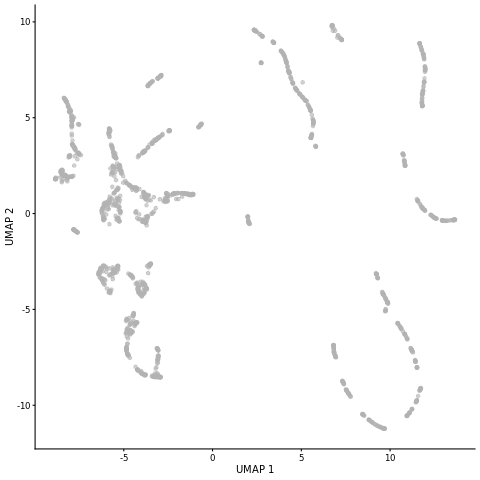

In [45]:
%%R
sce_vsg <- runUMAP(sce_vsg)
#sce_vsg
plotReducedDim(sce_vsg, dimred="UMAP")

In [46]:
%%R
library(bluster)
#clust.5 <- clusterCells(sce.pbmc, use.dimred="PCA", )


#nn.clusters <- clusterCells(sce_vsg, use.dimred="UMAP")
nn.clusters <- clusterCells(sce_vsg, assay.type='logcounts', BLUSPARAM=NNGraphParam(k=25))
table(nn.clusters)


nn.clusters
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 53 150 154 204  47  39  53  41  41  47  42  40  39  92  23  80  35  65  68  81 
 21  22  23  24  25  26  27 
 27  28  35  49  39  73  32 


## Plot Cluster
- here an attempt to use log counts for clustering.
- the cluster are visualized using umap 


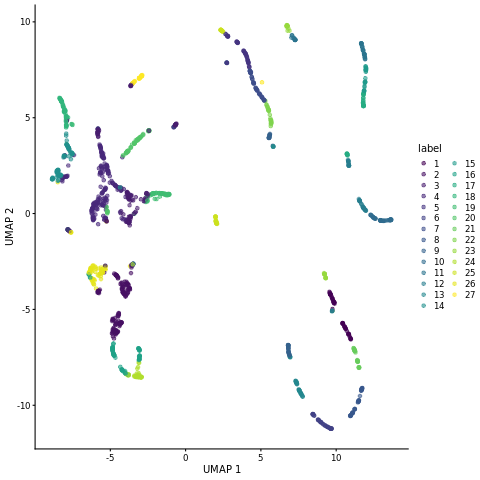

In [47]:
%%R
colLabels(sce_vsg) <- nn.clusters
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

## Plot z-score
here we compute and plot z scores for each vsgs

R[write to console]: 
Attaching package: 'celda'


R[write to console]: The following objects are masked from 'package:scater':

    normalizeCounts, plotHeatmap


R[write to console]: The following object is masked from 'package:scuttle':

    normalizeCounts


R[write to console]: The following object is masked from 'package:S4Vectors':

    params




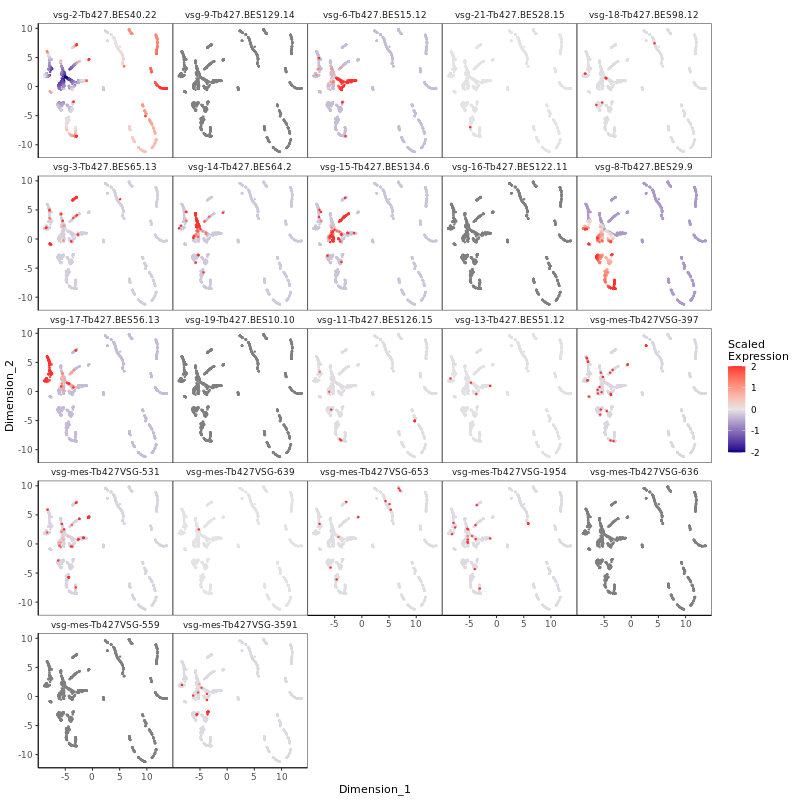

In [48]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE)

## Plot log counts
here we plot the log counts of the vsgs withput scaling

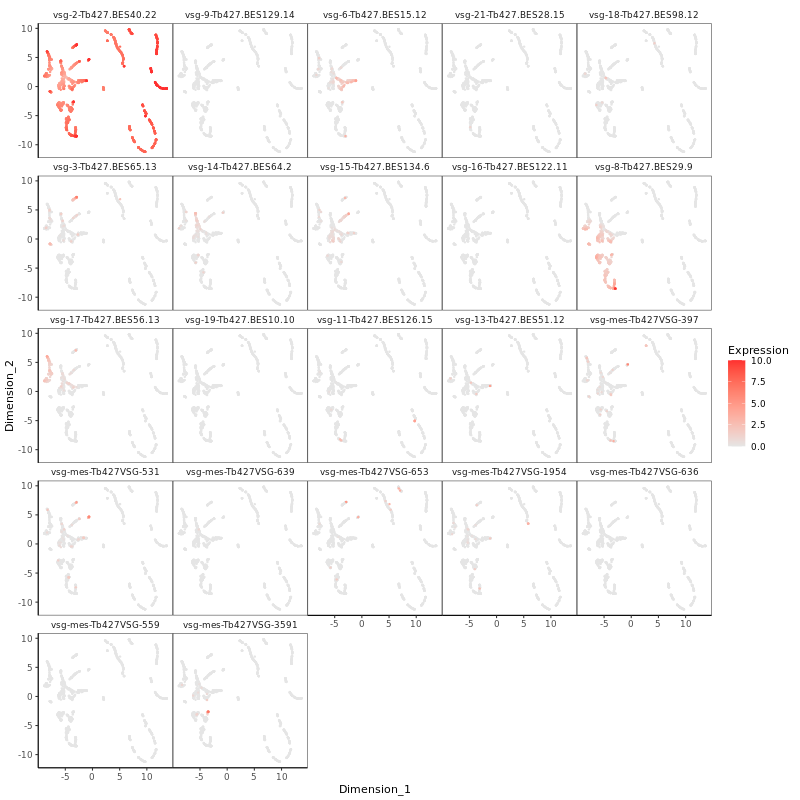

In [49]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE,
    zscore=FALSE,
    trim = c(0, 10),                 
    limits = c(0, 10),)

In [50]:
%%R
max(logcounts(sce_vsg))

[1] 16.26547


In [51]:
%%R
head(colLabels(sce_vsg))

[1] 16 17 25 22 13 16
27 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 27


In [52]:
%%R
rd<-reducedDim(sce_vsg, "UMAP")[,1:2]

In [53]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']



In [54]:
%%R
lab<-colLabels(sce_vsg)
head(lab)

[1] 16 17 25 22 13 16
27 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 27


In [55]:
%R -o lab
umap = pd.concat([pd.read_csv('new_count_vsg_vex1_1_norm.csv').T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv('new_count_vsg_vex1_1_norm.csv')
umap.head()


,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,7.649063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.275254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.209172,-8.164406,16
AAACCCACATGGTACT-1,9.815735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.734722,3.070920,17
AAACGCTCAACTGATC-1,6.327926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.050139,-0.497645,25
AAAGAACAGGTGCATG-1,7.268900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.439358,5.555626,22
AAAGGATCAATCTCTT-1,7.714951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.703758,-9.448577,13


In [56]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']

In [57]:
%R -o lab
umap = pd.concat([pd.read_csv("new_count_vsg_vex1_1.csv").T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv("new_count_vsg_vex1_1.csv")
umap.head()




,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,-4.209172,-8.164406,16
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10.734722,3.070920,17
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.050139,-0.497645,25
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.439358,5.555626,22
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.703758,-9.448577,13


In [58]:
%%R
count_feature <- colSums(counts(sce_vsg)>0)


## Plot umap vsg size
The umap is color coded by the number ov vsgs expressed in each cell
The center yellow blob show the cell expressin all 5 vsgs

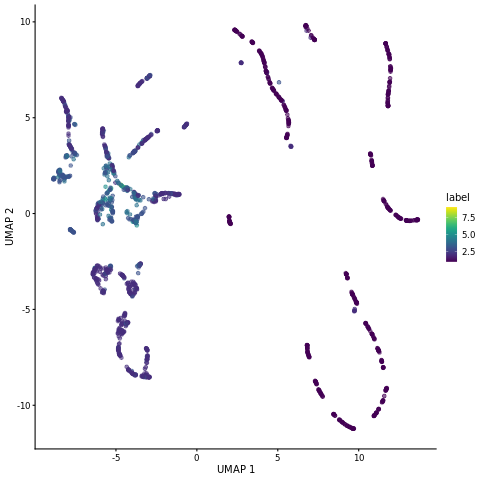

In [59]:
%%R
colLabels(sce_vsg) <- count_feature
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

In [60]:
#%%R
#is.vsg6_8 <- is.vsg6 | is.vsg8 
#is.other <- is.vsg15 | is.vsg17 | is.vsg2
#is.vsg6_8 <- is.vsg6_8 & is.other 
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,-4.209172,-8.164406,16
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10.734722,3.070920,17
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.050139,-0.497645,25
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.439358,5.555626,22
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.703758,-9.448577,13


In [61]:
umap.sum().drop(['comp1','comp2','clusters']).sort_values()

vsg-16-Tb427.BES122.11         0
vsg-9-Tb427.BES129.14          0
vsg-mes-Tb427VSG-636           0
vsg-19-Tb427.BES10.10          0
vsg-mes-Tb427VSG-559           0
vsg-21-Tb427.BES28.15          1
vsg-mes-Tb427VSG-639           2
vsg-mes-Tb427VSG-653          13
vsg-11-Tb427.BES126.15        16
vsg-mes-Tb427VSG-1954         24
vsg-mes-Tb427VSG-397          35
vsg-13-Tb427.BES51.12         64
vsg-mes-Tb427VSG-531          64
vsg-mes-Tb427VSG-3591         77
vsg-18-Tb427.BES98.12         94
vsg-3-Tb427.BES65.13         106
vsg-14-Tb427.BES64.2         182
vsg-15-Tb427.BES134.6        210
vsg-17-Tb427.BES56.13        470
vsg-6-Tb427.BES15.12         706
vsg-8-Tb427.BES29.9         1742
vsg-2-Tb427.BES40.22      106989
dtype: object

In [62]:
select = umap.drop(['comp1','comp2','clusters'],axis=1)
select.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-11-Tb427.BES126.15,vsg-13-Tb427.BES51.12,vsg-mes-Tb427VSG-397,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
vsg_class = []
for n in range(select.shape[0]):
    temp = select.iloc[n]
    temp = temp[temp>0]
    temp = list(temp.index)
    temp.sort()
    #print(temp)
    temp = [b for b in temp if b not in ['comp1','comp2']]
    temp.sort()
    temp=tuple(temp)
    vsg_class.append(temp)
    
    

umap['vsg_class'] = vsg_class
umap['size_class'] = [len(n) for n in  umap['vsg_class']]
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-4.209172,-8.164406,16,"(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)",2
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10.734722,3.070920,17,"(vsg-2-Tb427.BES40.22,)",1
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.050139,-0.497645,25,"(vsg-2-Tb427.BES40.22,)",1
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5.439358,5.555626,22,"(vsg-2-Tb427.BES40.22,)",1
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7.703758,-9.448577,13,"(vsg-2-Tb427.BES40.22,)",1


In [64]:
umap.vsg_class.value_counts().head(10)

(vsg-2-Tb427.BES40.22,)                                               595
(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)                           331
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22)                          74
(vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                           73
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)     59
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22)                          54
(vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)      49
(vsg-14-Tb427.BES64.2, vsg-2-Tb427.BES40.22)                           47
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)     41
(vsg-2-Tb427.BES40.22, vsg-3-Tb427.BES65.13)                           33
Name: vsg_class, dtype: int64

In [65]:
umap.size_class.value_counts()

2    658
1    595
3    308
4     93
5     17
6      3
7      2
9      1
Name: size_class, dtype: int64

In [66]:
umap.to_csv("new_count_vsg_vex1_1.csv")
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-4.209172,-8.164406,16,"(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)",2
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10.734722,3.070920,17,"(vsg-2-Tb427.BES40.22,)",1
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.050139,-0.497645,25,"(vsg-2-Tb427.BES40.22,)",1
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5.439358,5.555626,22,"(vsg-2-Tb427.BES40.22,)",1
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7.703758,-9.448577,13,"(vsg-2-Tb427.BES40.22,)",1


In [67]:
print(1)

1


In [68]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('new_count_vsg_vex1_1.csv',index_col =[0])
df.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGGAT-1,52,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-4.209172,-8.164406,16,"('vsg-2-Tb427.BES40.22', 'vsg-8-Tb427.BES29.9')",2
AAACCCACATGGTACT-1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10.734722,3.070920,17,"('vsg-2-Tb427.BES40.22',)",1
AAACGCTCAACTGATC-1,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.050139,-0.497645,25,"('vsg-2-Tb427.BES40.22',)",1
AAAGAACAGGTGCATG-1,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5.439358,5.555626,22,"('vsg-2-Tb427.BES40.22',)",1
AAAGGATCAATCTCTT-1,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7.703758,-9.448577,13,"('vsg-2-Tb427.BES40.22',)",1


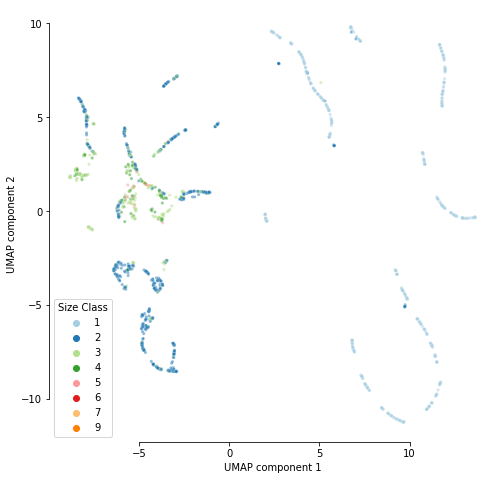

In [69]:
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='comp1',y='comp2', hue='size_class', ax=ax,
                alpha=0.5, s=10,palette ='Paired')
ax.legend(title='Size Class')
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')
sns.despine(fig,trim=True)